In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [4]:
# Load datasets
df = pd.read_excel('Dokumenter\ChildrenWristFeaturesV2_TSF_new.xlsx')
df.fillna(df.mean(), inplace=True)

In [5]:
# Initialize features and target/labels
X = df.iloc[:, 0:32]
Y = df.iloc[:, 32]

# Splits datasets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data preprocessing, scaling datasets/standardization
scal_data = StandardScaler()
X_train = scal_data.fit_transform(X_train)
X_test = scal_data.transform(X_test)

In [6]:
# Hyperparameter tuning
# Try different range of values
# Number of trees
n_estimators = range(10, 500, 40)
# Number of features to consider at every split
max_features = range(1, 32, 8)

# Create dictionary to store the hyperparameters
param_grid = { 'n_estimators': n_estimators,
               'max_features': max_features}

# Base model
rf = RandomForestClassifier()

In [7]:
# Use the gridSearchCV function to cross validate and find the best values for each hyperparameter
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

Fitting 5 folds for each of 52 candidates, totalling 260 fits
[CV] max_features=1, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. max_features=1, n_estimators=10, total=   2.0s
[CV] max_features=1, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .................. max_features=1, n_estimators=10, total=   1.8s
[CV] max_features=1, n_estimators=10 .................................
[CV] .................. max_features=1, n_estimators=10, total=   1.7s
[CV] max_features=1, n_estimators=10 .................................
[CV] .................. max_features=1, n_estimators=10, total=   1.8s
[CV] max_features=1, n_estimators=10 .................................
[CV] .................. max_features=1, n_estimators=10, total=   1.7s
[CV] max_features=1, n_estimators=50 .................................
[CV] .................. max_features=1, n_estimators=50, total=   8.5s
[CV] max_features=1, n_estimators=50 .................................
[CV] .................. max_features=1, n_estimators=50, total=   8.6s
[CV] max_features=1, n_estimators=50 .................................
[CV] .................. max_features=1, n_estimators=50, total=   9.4s
[CV] max_features=1, n_estimators=50 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed: 1431.1min finished


{'max_features': 25, 'n_estimators': 490}
0.8625162313497932


[0.03075005 0.17486395 0.04513254 0.03249315 0.04492636 0.02735287
 0.02234867 0.02401127 0.02027045 0.05040458 0.04322162 0.03382923
 0.10071296 0.04020318 0.01805898 0.03270995 0.03169135 0.00978952
 0.02548823 0.02090703 0.01358516 0.01771998 0.02075495 0.01679483
 0.00470474 0.00975816 0.01375194 0.02236856 0.00982998 0.01200472
 0.01133969 0.01822136]


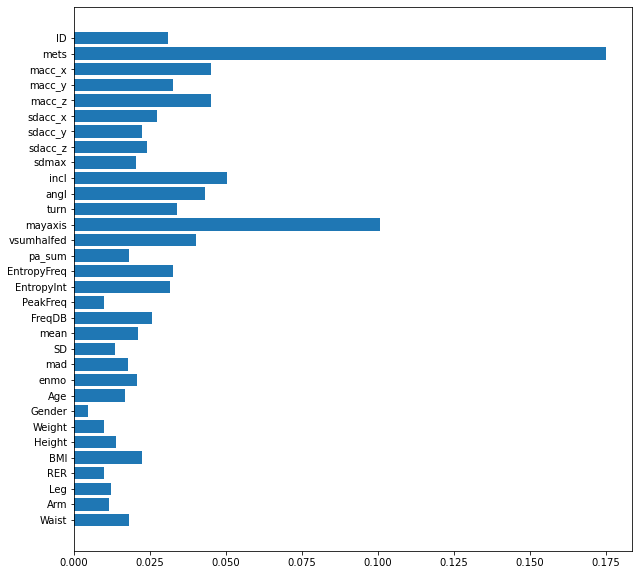

In [38]:
# Feature importance
print(rf_grid.best_estimator_.feature_importances_)

# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(32, 0, -1), rf_grid.best_estimator_.feature_importances_[0:32])
plt.yticks(range(32, 0, -1), df.columns.tolist()[0:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

Feature: 0, Score: 0.03075
Feature: 1, Score: 0.17486
Feature: 2, Score: 0.04513
Feature: 3, Score: 0.03249
Feature: 4, Score: 0.04493
Feature: 5, Score: 0.02735
Feature: 6, Score: 0.02235
Feature: 7, Score: 0.02401
Feature: 8, Score: 0.02027
Feature: 9, Score: 0.05040
Feature: 10, Score: 0.04322
Feature: 11, Score: 0.03383
Feature: 12, Score: 0.10071
Feature: 13, Score: 0.04020
Feature: 14, Score: 0.01806
Feature: 15, Score: 0.03271
Feature: 16, Score: 0.03169
Feature: 17, Score: 0.00979
Feature: 18, Score: 0.02549
Feature: 19, Score: 0.02091
Feature: 20, Score: 0.01359
Feature: 21, Score: 0.01772
Feature: 22, Score: 0.02075
Feature: 23, Score: 0.01679
Feature: 24, Score: 0.00470
Feature: 25, Score: 0.00976
Feature: 26, Score: 0.01375
Feature: 27, Score: 0.02237
Feature: 28, Score: 0.00983
Feature: 29, Score: 0.01200
Feature: 30, Score: 0.01134
Feature: 31, Score: 0.01822


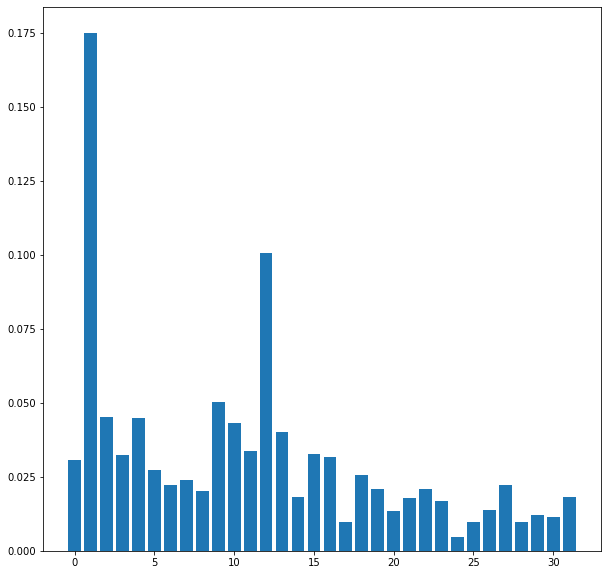

In [39]:
# Analyze features using feature importance
importance = rf_grid.best_estimator_.feature_importances_
# Summarize features importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.figure(figsize=(10, 10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score
X_new = df.iloc[:,importance[importance>=0.025]]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, Y, test_size=0.2, random_state=42)
rf_new = RandomForestClassifier(n_estimators=490, max_features=(0, 25))
rf_new.fit(X_train_new, y_train_new)
pred_train = rf_new.predict(X_train_new)
pred_test = rf_new.predict(X_test_new)
print(rf_new.score(X_train_new, y_train_new))
print(rf_new.score(X_test_new, y_test_new))
auc_tr = roc_auc_score(y_train_new, rf_new.predict_proba(X_train_new), average=None)
auc_ts = roc_auc_score(y_test_new, rf_new.predict_proba(X_test_new), average=None)

cv_results = cross_validate(rf_new, X_new, Y, cv=5, scoring=['roc_auc_score', 'score'])


TypeError: '>' not supported between instances of 'tuple' and 'float'